## Based on https://github.com/chkwon/TrafficAssignment.jl

In [1]:
include("../Julia_files/load_network_uni_class.jl")

load_ta_network (generic function with 2 methods)

In [2]:
using Graphs

function create_graph(start_node, end_node)
    @assert Base.length(start_node)==Base.length(end_node)

    no_node = max(maximum(start_node), maximum(end_node))
    no_arc = Base.length(start_node)

    graph = simple_inclist(no_node)
    for i=1:no_arc
        add_edge!(graph, start_node[i], end_node[i])
    end
    return graph
end

create_graph (generic function with 1 method)

In [3]:
function get_vector(state, origin, destination, link_dic)
    current = destination
    parent = -1
    x = zeros(Int, maximum(link_dic))

    while parent != origin
        parent = state.parents[current]

        link_idx = link_dic[parent,current]

        if link_idx != 0
            x[link_idx] = 1
        end

        current = parent
    end

    return x
end

get_vector (generic function with 1 method)

In [4]:
ta_data = load_ta_network("East_Massachusetts_Apr_AM")

TA_Data("East_Massachusetts_Apr_AM",8,0,1,24,[1,2,1,3,2,3,2,4,3,5  …  5,6,4,8,5,7,6,7,7,8],[2,1,3,1,3,2,4,2,5,3  …  6,5,8,4,7,5,7,6,8,7],[5881.03,5723.73,7257.79,7352.89,7259.77,7367.74,6144.81,6141.05,7977.67,7839.68  …  5930.99,4755.89,6000.0,6000.0,7240.18,7284.73,6927.24,6690.82,6000.0,6000.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.294839,0.314894,0.437603,0.44623,0.136564,0.162954,0.512348,0.528436,0.226178,0.236022  …  0.166785,0.164794,0.330009,0.329602,0.178723,0.177963,0.245841,0.244939,0.18718,0.192552],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],0.0,[0.0 0.0 … 1.0e-6 0.0; 0.0008 0.0 … 1

In [5]:
ta_data.travel_demand

8×8 Array{Float64,2}:
    0.0          0.0       2807.53    …  1340.19      1.0e-6     0.0   
    0.0008       0.0        883.421       581.764     1.0e-6     1.0e-6
 5901.7       6786.29         0.0        1841.61   9939.58       1.0e-6
 2668.09      1092.22      1249.14       1929.57   1786.19    3397.04  
    0.052653     0.016222  4452.83       4603.18   2580.54    1031.54  
    5.2e-5       5.2e-5    6241.14    …     0.0    5002.91    1140.92  
    1.0e-6       1.0e-6    6377.68       2987.57      0.0     1646.37  
    1.0e-6       1.0e-6       1.0e-6      773.437  1118.37       0.0   

In [6]:
# unpacking data from ta_data
network_name = ta_data.network_name

number_of_zones = ta_data.number_of_zones
number_of_nodes = ta_data.number_of_nodes
first_thru_node = ta_data.first_thru_node
number_of_links = ta_data.number_of_links

start_node = ta_data.start_node
end_node = ta_data.end_node
capacity = ta_data.capacity
link_length = ta_data.link_length

free_flow_time = ta_data.free_flow_time
speed_limit = ta_data.speed_limit
toll = ta_data.toll
link_type = ta_data.link_type
number_of_zones = ta_data.number_of_zones
total_od_flow = ta_data.total_od_flow
travel_demand = ta_data.travel_demand
od_pairs = ta_data.od_pairs

64-element Array{Any,1}:
 (1,1)
 (1,2)
 (1,3)
 (1,4)
 (1,5)
 (1,6)
 (1,7)
 (1,8)
 (2,2)
 (2,1)
 (2,3)
 (2,4)
 (2,5)
 ⋮    
 (7,4)
 (7,5)
 (7,6)
 (7,8)
 (8,8)
 (8,1)
 (8,2)
 (8,3)
 (8,4)
 (8,5)
 (8,6)
 (8,7)

In [7]:
# preparing a graph
graph = create_graph(start_node, end_node)
link_dic = sparse(start_node, end_node, 1:number_of_links)

8×8 sparse matrix with 24 Int64 nonzero entries:
	[2, 1]  =  2
	[3, 1]  =  4
	[1, 2]  =  1
	[3, 2]  =  6
	[4, 2]  =  8
	[1, 3]  =  3
	[2, 3]  =  5
	[5, 3]  =  10
	[6, 3]  =  12
	[2, 4]  =  7
	⋮
	[4, 5]  =  13
	[6, 5]  =  16
	[7, 5]  =  20
	[3, 6]  =  11
	[5, 6]  =  15
	[7, 6]  =  22
	[5, 7]  =  19
	[6, 7]  =  21
	[8, 7]  =  24
	[4, 8]  =  17
	[7, 8]  =  23

In [8]:
graph.inclist, graph.is_directed, graph.nedges, graph.vertices

(Array{Graphs.Edge{Int64},1}[Graphs.Edge{Int64}[edge [1]: 1 -- 2,edge [3]: 1 -- 3],Graphs.Edge{Int64}[edge [2]: 2 -- 1,edge [5]: 2 -- 3,edge [7]: 2 -- 4],Graphs.Edge{Int64}[edge [4]: 3 -- 1,edge [6]: 3 -- 2,edge [9]: 3 -- 5,edge [11]: 3 -- 6],Graphs.Edge{Int64}[edge [8]: 4 -- 2,edge [13]: 4 -- 5,edge [17]: 4 -- 8],Graphs.Edge{Int64}[edge [10]: 5 -- 3,edge [14]: 5 -- 4,edge [15]: 5 -- 6,edge [19]: 5 -- 7],Graphs.Edge{Int64}[edge [12]: 6 -- 3,edge [16]: 6 -- 5,edge [21]: 6 -- 7],Graphs.Edge{Int64}[edge [20]: 7 -- 5,edge [22]: 7 -- 6,edge [23]: 7 -- 8],Graphs.Edge{Int64}[edge [18]: 8 -- 4,edge [24]: 8 -- 7]],true,24,1:8)

In [9]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [10]:
coeffs_dict_Apr_AM_ = readstring("../temp_files/coeffs_dict_Apr_AM.json")
coeffs_dict_Apr_AM_ = JSON.parse(coeffs_dict_Apr_AM_)
fcoeffs = coeffs_dict_Apr_AM_["(8,0.5,10000.0,1)"]

9-element Array{Any,1}:
  1.0       
 -0.00340867
  0.0567433 
 -0.196367  
  0.621907  
 -0.901119  
  0.940685  
 -0.46646   
  0.109154  

In [11]:
# fcoeffs = [1, 0, 0, 0, 0.15]

In [12]:
function BPR(x)
    bpr = similar(x)
    for i = 1:length(bpr)
        bpr[i] = free_flow_time[i] * polyEval(fcoeffs, x[i]/capacity[i]) 
    end
    return bpr
end

BPR (generic function with 1 method)

In [13]:
function all_or_nothing(travel_time)
    state = []
    path = []
    x = zeros(size(start_node))
    for r=1:size(travel_demand)[1]
        # for each origin node r, find shortest paths to all destination nodes
        state = dijkstra_shortest_paths(graph, travel_time, r)
        for s=1:size(travel_demand)[2]
            # for each destination node s, find the shortest-path vector
            # load travel demand
            x = x + travel_demand[r,s] * get_vector(state, r, s, link_dic)
        end
    end
    return x
end

all_or_nothing (generic function with 1 method)

In [14]:
function sensiTC(link_idx, deltaT=0, deltaC=0)
    capacity = ta_data.capacity
    free_flow_time = ta_data.free_flow_time
    
    free_flow_time[link_idx] -= deltaT
    capacity[link_idx] += deltaC

    # Finding a starting feasible solution
    travel_time = BPR(zeros(number_of_links))
    xl = all_or_nothing(travel_time)

    max_iter_no = 1e4
    l = 1
    #average_excess_cost = 1
    tol = 1e-6

    while l < max_iter_no
        l += 1

        xl_old = xl

        # Finding yl
        travel_time = BPR(xl)

        yl = all_or_nothing(travel_time)

        # assert(yl != xl)

        xl = xl + (yl - xl)/l

        xl_new = xl

        relative_gap = norm(xl_new - xl_old, 1) / norm(xl_new, 1)

#         if l % 5000 == 0
#             print("l = $l------------------------------------------------\n")
#             print("relative_gap is $relative_gap\n")
#         end

        if relative_gap < tol 
            print("l = $l------------------------------------------------\n")
            print("relative_gap is $relative_gap\n")
            break
        end
    end

    function tapObj(linkFlowVec)
        objVal = zeros(number_of_links)
        for a = 1:number_of_links
            for i = 1:length(fcoeffs)
                objVal[a] += free_flow_time[a] * fcoeffs[i] * linkFlowVec[a]^i / capacity[a]^(i-1)
            end
        end
        return sum(objVal)
    end

    return tapObj(xl)
end

sensiTC (generic function with 3 methods)

In [15]:
deltaObjT = zeros(number_of_links)
deltaObjC = zeros(number_of_links)

for link_idx = 1:number_of_links
# for link_idx = 20:20
    deltaT = minimum(free_flow_time) * 0.2
    deltaC = minimum(capacity) * 0.2
    
    deltaObjT[link_idx] = sensiTC(link_idx, 0, 0) - sensiTC(link_idx, deltaT, 0)
    deltaObjC[link_idx] = sensiTC(link_idx, 0, 0) - sensiTC(link_idx, 0, deltaC)
    
    print("link_idx = $(link_idx) finished\n")
    print("-------------------------------------------\n")
end

link_idx = 1 finished
-------------------------------------------
link_idx = 2 finished
-------------------------------------------
link_idx = 3 finished
-------------------------------------------
link_idx = 4 finished
-------------------------------------------
link_idx = 5 finished
-------------------------------------------
link_idx = 6 finished
-------------------------------------------
link_idx = 7 finished
-------------------------------------------
link_idx = 8 finished
-------------------------------------------
link_idx = 9 finished
-------------------------------------------
link_idx = 10 finished
-------------------------------------------
link_idx = 11 finished
-------------------------------------------
link_idx = 12 finished
-------------------------------------------
link_idx = 13 finished
-------------------------------------------
link_idx = 14 finished
-------------------------------------------
link_idx = 15 finished
-------------------------------------------
link

In [16]:
deltaObjT

24-element Array{Float64,1}:
  65.0442
  74.9304
  30.3244
 168.693 
 130.892 
 164.65  
  70.526 
 192.212 
 135.606 
 146.403 
 191.788 
 271.789 
 146.475 
  43.7618
 178.744 
  53.4582
 253.312 
  36.8663
 116.601 
  48.2335
 170.49  
 187.107 
  85.4308
 295.988 

In [17]:
deltaObjC

24-element Array{Float64,1}:
   17.221   
    3.11309 
    0.112724
   58.8381  
   12.5124  
   43.7041  
    6.77866 
   68.4482  
   38.284   
  606.439   
   51.3214  
  297.532   
   99.0123  
    0.321595
  122.798   
    1.76291 
  281.897   
    0.3499  
 1071.17    
    2.81611 
  376.85    
   57.5609  
    7.03416 
   12.3313  

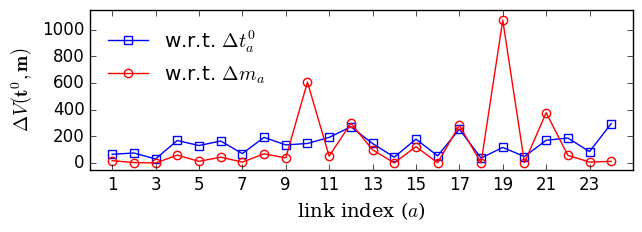

In [22]:
using PyPlot

xs = 1:number_of_links
ys1 = deltaObjT
ys2 = deltaObjC

fig = figure(figsize=(7,2))

PyPlot.plot(xs, ys1, "s-b", label=L"w.r.t. $\Delta{t}_a^0$", linewidth=1,
markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)

PyPlot.plot(xs, ys2, "o-r", label=L"w.r.t. $\Delta{m}_a$", linewidth=1,
markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

legend(loc="upper left", fancybox="true", frameon=false, numpoints=1) 

# grid("on")
# xlim(-0.1, 1.05);
ylim(-50, 1150);

xticks(1:2:24)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel(L"link index ($a$)", fontdict=font1)
ylabel(L"$\Delta V\left( {{\bf{t}^0},\bf{m}} \right)$", fontdict=font1)

savefig("./results/sensiTC_Apr_AM.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"MA_traffic_IEEE_special_issue_18/imag/"

savefig(dire * "sensiTC_Apr_AM.pdf", dpi=300, bbox_inches="tight")